In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt


curr_path = os.getcwd()
output_folder = curr_path + "/"+'Feature2'  # 출력 폴더 경로

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

video_list = os.listdir()
video_list = [ x for x in video_list if x.endswith(".mp4") ]

print(video_list)

['1.mp4', '10.mp4', '11.mp4', '12.mp4', '13.mp4', '14.mp4', '15.mp4', '16.mp4', '17.mp4', '18.mp4', '19.mp4', '2.mp4', '20.mp4', '3.mp4', '4.mp4', '5.mp4', '6.mp4', '7.mp4', '8.mp4', '9.mp4']


In [6]:
def calc_motion_vector_sizes(video_list):

    feature_params = dict(maxCorners=200, qualityLevel=0.01, minDistance=10, blockSize=10)

    lk_params = dict(winSize=(21, 21), maxLevel=3, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    for filename in video_list:
        print(f"processing vidoe {filename}")

        cap = cv2.VideoCapture( os.getcwd() + "/" + filename)

        frame_count = 0
        prev_frame = None
        good_new = None
        good_old = None 
        gray = None
        motion_vector_sizes = []

        while True:

            frame_count += 1
            if not frame_count % 1000 :
                print(f"frame_{frame_count} is procssing")

            ret, frame = cap.read()

            if not ret:
                break

            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray = cv2.resize(gray, (256,256))

            if prev_frame is None:
                prev_frame = gray
                continue

            prev_corners = cv2.goodFeaturesToTrack(prev_frame, mask=None, **feature_params)

            if prev_corners is not None :
                curr_corners, status, errors = cv2.calcOpticalFlowPyrLK(prev_frame, gray, prev_corners, None, **lk_params)

                good_new = curr_corners[(status==1)]
                good_old = prev_corners[(status==1)]

                motion_vector_size = np.sqrt(np.sum((good_new - good_old)**2, axis=1)).sum()

                motion_vector_sizes.append(motion_vector_size)

                prev_corners = good_new
                prev_frame = gray
            
            else : 
                print(f"video_{filename}에서 {frame_count} 번쩨 Frame 특징점 못 찾음")
                motion_vector_sizes.append(0)
                prev_frame = gray

                
        output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_feature.npy")
        np.save( output_path, motion_vector_sizes) 
        
        cap.release()

In [7]:
calc_motion_vector_sizes(video_list)

processing vidoe 1.mp4
frame_1000 is procssing
frame_2000 is procssing
frame_3000 is procssing
processing vidoe 10.mp4
frame_1000 is procssing
frame_2000 is procssing
frame_3000 is procssing
processing vidoe 11.mp4
frame_1000 is procssing
frame_2000 is procssing
frame_3000 is procssing
processing vidoe 12.mp4
frame_1000 is procssing
frame_2000 is procssing
frame_3000 is procssing
frame_4000 is procssing
processing vidoe 13.mp4
frame_1000 is procssing
frame_2000 is procssing
frame_3000 is procssing
processing vidoe 14.mp4
frame_1000 is procssing
frame_2000 is procssing
frame_3000 is procssing
frame_4000 is procssing
processing vidoe 15.mp4
frame_1000 is procssing
frame_2000 is procssing
frame_3000 is procssing
processing vidoe 16.mp4
frame_1000 is procssing
frame_2000 is procssing
frame_3000 is procssing
frame_4000 is procssing
processing vidoe 17.mp4
frame_1000 is procssing
frame_2000 is procssing
frame_3000 is procssing
processing vidoe 18.mp4
frame_1000 is procssing
frame_2000 is pro

In [7]:
data_dir  = os.getcwd( ) +"/Feature"
file_list = os.listdir(data_dir)
file_list = [ int(x.split("_")[0]) for x in file_list ]
file_list.sort()
file_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [8]:
sum_list = []
for file in file_list : 
    file = str(file) + "_feature.npy"
    arr = np.load( os.path.join(data_dir, file)).astype(float)
    #mask = ~np.isinf(arr)
    #sum_rels = np.sum(arr[mask])
    sum_rels = arr.sum()
    sum_list.append(sum_rels)
print(sum_list)

[1397898.9165153503, 1608319.8070793152, 4279125.820962369, 3038073.2938690186, 3160291.5948028564, 1275451.963476181, 1882909.8793869019, 855707.2544529438, 939339.4706926346, 992931.7067897618, 464478.0611305237, 697266.6778583527, 446106.7089519501, 550859.0747827291, 321812.89921232313, 163459.47592677176, 217972.47179382294, 105054.86492872238, 129225.1735234838, 66956.95264635328]


([<matplotlib.axis.XTick at 0x1c9608b4160>,
 [Text(2, 0, 'HMHB'),
  Text(7, 0, 'HMLB'),
  Text(12, 0, 'LMLB'),
  Text(17, 0, 'LMLB')])

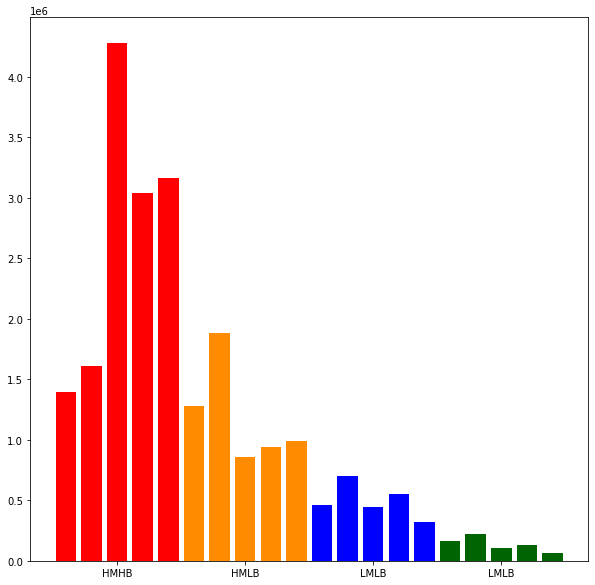

In [9]:
fig = plt.figure(figsize=(10,10));
plt.bar( range(len(sum_list)), sum_list, color=np.repeat(["r","darkorange","b","darkgreen"], 5));
plt.xticks( [2,7,12,17] , ["HMHB","HMLB","LMLB","LMLB"]);